# AFLOW Assignment - Rielle

My assignment was to create a Jupyter notebook that determines the compound with the lowest formation enthalpy in a binary system using the AFLOW database and the AFLUX API. I was also told to demonstrate that my code works on the Mn-Pd system. My code should recreate results found using AFLOW-CHULL.

In [51]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from urllib.request import urlopen

elements = ['Mn','Pd']
elements.sort()

SERVER='http://aflowlib.duke.edu'
API='/search/API/?'
SUMMONS="stoichiometry,species,enthalpy_formation_atom,$auid,$aurl,catalog('lib2'),$paging(0)"
response=json.loads(urlopen(SERVER+API+SUMMONS).read().decode('utf-8'))

In [52]:
response

[{'compound': 'Pt1',
  'stoichiometry': '1',
  'species': 'Pt',
  'enthalpy_formation_atom': '4.8e-05'},
 {'compound': 'Sr6',
  'stoichiometry': '1',
  'species': 'Sr',
  'enthalpy_formation_atom': '0.00509033'},
 {'compound': 'Sr1',
  'stoichiometry': '1',
  'species': 'Sr',
  'enthalpy_formation_atom': '2.5e-05'},
 {'compound': 'Pt4',
  'stoichiometry': '1',
  'species': 'Pt',
  'enthalpy_formation_atom': '0.00799875'},
 {'compound': 'Pt1',
  'stoichiometry': '1',
  'species': 'Pt',
  'enthalpy_formation_atom': '0.091733'},
 {'compound': 'Sr4',
  'stoichiometry': '1',
  'species': 'Sr',
  'enthalpy_formation_atom': '0.127666'},
 {'compound': 'Sr2',
  'stoichiometry': '1',
  'species': 'Sr',
  'enthalpy_formation_atom': '0.960152'},
 {'compound': 'Sr1',
  'stoichiometry': '1',
  'species': 'Sr',
  'enthalpy_formation_atom': '0.004128'},
 {'compound': 'Pt2',
  'stoichiometry': '1',
  'species': 'Pt',
  'enthalpy_formation_atom': '1.06346'},
 {'compound': 'Pt1',
  'stoichiometry': '1',


Once I entered a query that isolated information about the stoichiometry, species, and formation enthalpy of all `aflowlib_entries` in `lib2`, the library that contains all binary compounds, I narrowed down the list of dictionary items to all items that contained all entries in my list `elements`. These items were then stored in a list of dictionary items called `binary_compounds`.

In [40]:
binary_compounds = [] # We're going to assume that we're given only 2 elements
for i in range(len(response)):
    all_elements = True
    for entry in elements:
        if entry not in response[i]['species']:
            all_elements = False
    if all_elements:
        binary_compounds.append(response[i])

In [53]:
binary_compounds

[{'compound': 'Mn2Pd44',
  'stoichiometry': '0.0434782609,0.956521739',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '0.140106'},
 {'compound': 'Mn2Pd26',
  'stoichiometry': '0.0714285714,0.928571429',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '0.251998'},
 {'compound': 'Mn1Pd8',
  'stoichiometry': '0.111111111,0.888888889',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '-0.124903'},
 {'compound': 'Mn1Pd7',
  'stoichiometry': '0.125,0.875',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '-0.130966'},
 {'compound': 'Mn1Pd5',
  'stoichiometry': '0.166666667,0.833333333',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '-0.17459'},
 {'compound': 'Mn1Pd5',
  'stoichiometry': '0.166666667,0.833333333',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '-0.127268'},
 {'compound': 'Mn1Pd5',
  'stoichiometry': '0.166666667,0.833333333',
  'species': 'Mn,Pd',
  'enthalpy_formation_atom': '-0.147153'},
 {'compound': 'Mn1Pd5',
  'stoichiometry': '0.166666667,0.83333333

I then calculated the convex hull using the atomic ratios of Manganese and formation enthalpies in the `binary_compounds` list to find the atomic ratios and formation enthalpies of stable compounds (with the help of [SciPy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html)). 

For simplicity, I left the formation enthalpy as electron volts per atom (rather than meV) and the atomic ratio as decimals.

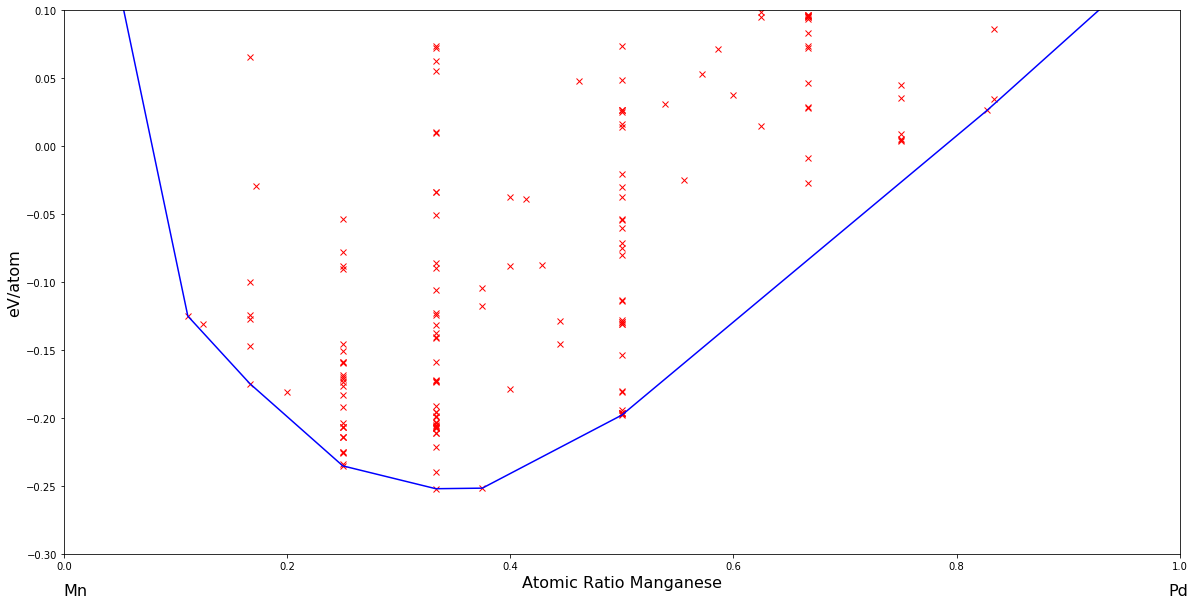

In [167]:
plt.figure(figsize=(20,10))
x = [float(compound['stoichiometry'].split(',')[0]) for compound in binary_compounds]
y = [float(compound['enthalpy_formation_atom']) for compound in binary_compounds]
points = np.array([x, y], dtype=np.float64).transpose()
hull = ConvexHull(points)
plt.xlabel('Atomic Ratio Manganese', fontsize=16)
plt.ylabel('eV/atom', fontsize=16)
plt.plot(points[:,0], points[:,1], 'rx')
stable_ratio = points[hull.vertices,0]
stable_enthalpy = points[hull.vertices,1]
plt.plot(stable_ratio, stable_enthalpy, 'b-')
plt.axis([0, 1, -0.3, 0.1])
plt.text(0,-0.33, elements[0], fontsize=16)
plt.text(0.99, -0.33, elements[1], fontsize=16)
plt.show()

Using `stable_ratio` and `stable_enthalpy`, I calculated the minimum stable enthalpy to find the lowest formation enthalpy in a binary system, and found it's corresponding atomic ratio of Manganese.

In [168]:
stable_ratio_list = stable_ratio.tolist()
stable_enthalpy_list = stable_enthalpy.tolist()
ls_enthalpy = min(stable_enthalpy_list) # lowest stable enthalpy
ls_ratio = stable_ratio_list[stable_enthalpy_list.index(ls_enthalpy)]
print(ls_ratio, ls_enthalpy)

0.333333333 -0.251933


In [171]:
y.index(ls_enthalpy)

84

In [172]:
x[84]

0.333333333

In [173]:
binary_compounds[84]

{'compound': 'Mn4Pd8',
 'stoichiometry': '0.333333333,0.666666667',
 'species': 'Mn,Pd',
 'enthalpy_formation_atom': '-0.251933'}